### Kütüphaneleri İçeri Aktarma

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
from DataMacpy import *

DataMacpy Setup


### Veriyi Ön İşleme

In [3]:
# Veriyi içeri aktaralım.

# veri yolumuzu verelim
file_path = 'pokemon.csv'

# verimizi okuyoruz. 
pokemon_data = pd.read_csv(file_path)

print("Setup Complete")

Setup Complete


In [4]:
# Veri Görselleştirme

pokemon_data.head(5)

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [5]:
# hedef kolonumuzu belirleyelim.
y_not_enc = pokemon_data.Type_1
y_not_enc

0        Grass
1        Grass
2        Grass
3         Fire
4         Fire
        ...   
716       Dark
717     Dragon
718       Rock
719    Psychic
720       Fire
Name: Type_1, Length: 721, dtype: object

In [6]:
# target verilerimiz string olduğu için LabelEncoder yapıyoruz. Her sınıfı bir sayıya atıyoruz.
l_fit = LabelEncoder().fit(y_not_enc)
y = l_fit.transform(y_not_enc)
#y = pd.DataFrame(y, columns = ["Type_1"]) # dataframe'e çevirmek için bu satırı kullanabiliriz.
y[0:20]

array([ 9,  9,  9,  6,  6,  6, 17, 17, 17,  0,  0,  0,  0,  0,  0, 12, 12,
       12, 12, 12])

In [7]:
# labellerimizi buluyoruz.
y_label = l_fit.inverse_transform([i for i in range(max(y)+1)])
label_and_num = list(zip(y_label, [i for i in range(max(y)+1)]))
label_and_num

[('Bug', 0),
 ('Dark', 1),
 ('Dragon', 2),
 ('Electric', 3),
 ('Fairy', 4),
 ('Fighting', 5),
 ('Fire', 6),
 ('Flying', 7),
 ('Ghost', 8),
 ('Grass', 9),
 ('Ground', 10),
 ('Ice', 11),
 ('Normal', 12),
 ('Poison', 13),
 ('Psychic', 14),
 ('Rock', 15),
 ('Steel', 16),
 ('Water', 17)]

In [8]:
# özniteliklerimizi belirleyelim.
X = pokemon_data
X.drop(["Number", "Type_1"], axis=1, inplace=True) # tüm verilerimizden hedef kolonumuzu çıkarıyoruz.
# Number kolonumuzu da gereksiz olduğu eğitimde gereksiz olduğu için çıkarıyoruz.
X

,Name,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,Bulbasaur,Poison,318,45,49,49,65,65,45,1,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,Ivysaur,Poison,405,60,62,63,80,80,60,1,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,Venusaur,Poison,525,80,82,83,100,100,80,1,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,Charmander,NaN,309,39,52,43,60,50,65,1,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,Charmeleon,NaN,405,58,64,58,80,65,80,1,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,Yveltal,Flying,680,126,131,95,131,98,99,6,...,Red,False,NaN,Undiscovered,NaN,False,5.79,203.0,45,two_wings
717,Zygarde,Ground,600,108,100,121,81,95,95,6,...,Green,False,NaN,Undiscovered,NaN,False,5.00,305.0,3,serpentine_body
718,Diancie,Fairy,600,50,100,150,100,150,50,6,...,Pink,False,NaN,Undiscovered,NaN,True,0.71,8.8,3,head_arms
719,Hoopa,Ghost,600,80,110,60,150,130,70,6,...,Purple,False,NaN,Undiscovered,NaN,False,0.51,9.0,3,head_only


In [9]:
# DataMacpy kütüphanemizdeki fonksiyon ile eksik veriye sahip kolonları buluyoruz.
cols_with_missing = find_missing_cols(X)
cols_with_missing

['Type_2', 'Pr_Male', 'Egg_Group_2']

In [10]:
# Eksik bilgileri düşürüyoruz.
print(f"Eksik veriler düşürülmeden önce verilerimizin boyutu: {X.shape}")
X.drop(cols_with_missing, axis=1, inplace=True)
print(f"Eksik veriler düşürüldükten sonra verilerimizin boyutu: {X.shape}")

Eksik veriler düşürülmeden önce verilerimizin boyutu: (721, 21)
Eksik veriler düşürüldükten sonra verilerimizin boyutu: (721, 18)


In [11]:
# DataMacpy kütüphanemizdeki fonksiyon ile benzersiz birimi 15'den fazla olan veri tipi object içeren kolonları buluyoruz.
object_cols, d = calc_object_cols(X, 15)
print(f"object_cols: {object_cols}\n\n d: {d}")

# Bu kolonları düşürüyoruz çünkü her veriye özel bir benzersiz bilgi içeriyorsa overfitting olabilir.
# Eğer dönüştürmeye kalkarsak her benzersiz birim için OneHotEncoder yaparsak çok fazla kolona sahip veri seti elde ederiz.
X = X.drop(object_cols, axis = 1)
X

object_cols: ['Name']

 d: {'Name': 721}


,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,318,45,49,49,65,65,45,1,False,Green,True,Monster,False,0.71,6.9,45,quadruped
1,405,60,62,63,80,80,60,1,False,Green,True,Monster,False,0.99,13.0,45,quadruped
2,525,80,82,83,100,100,80,1,False,Green,True,Monster,True,2.01,100.0,45,quadruped
3,309,39,52,43,60,50,65,1,False,Red,True,Monster,False,0.61,8.5,45,bipedal_tailed
4,405,58,64,58,80,65,80,1,False,Red,True,Monster,False,1.09,19.0,45,bipedal_tailed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,680,126,131,95,131,98,99,6,True,Red,False,Undiscovered,False,5.79,203.0,45,two_wings
717,600,108,100,121,81,95,95,6,True,Green,False,Undiscovered,False,5.00,305.0,3,serpentine_body
718,600,50,100,150,100,150,50,6,True,Pink,False,Undiscovered,True,0.71,8.8,3,head_arms
719,600,80,110,60,150,130,70,6,True,Purple,False,Undiscovered,False,0.51,9.0,3,head_only


In [12]:
# DataMacpy kütüphanemizdeki fonksiyon ile benzersiz birimi 0'dan fazla olan veri tipi object içeren
# kolonları buluyoruz.
object_cols, d = calc_object_cols(X, 0)
print(f"object_cols: {object_cols}\n\n d: {d}")

object_cols: ['Color', 'Egg_Group_1', 'Body_Style']

 d: {'Color': 10, 'Egg_Group_1': 15, 'Body_Style': 14}


In [13]:
# Verilerimize OrdinalEncoder uyguluyoruz. OneHot denemesi yapılacak!
ordinal_encoder = OrdinalEncoder()
X[object_cols] = ordinal_encoder.fit_transform(X[object_cols])
X

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,318,45,49,49,65,65,45,1,False,3.0,True,10.0,False,0.71,6.9,45,9.0
1,405,60,62,63,80,80,60,1,False,3.0,True,10.0,False,0.99,13.0,45,9.0
2,525,80,82,83,100,100,80,1,False,3.0,True,10.0,True,2.01,100.0,45,9.0
3,309,39,52,43,60,50,65,1,False,7.0,True,10.0,False,0.61,8.5,45,0.0
4,405,58,64,58,80,65,80,1,False,7.0,True,10.0,False,1.09,19.0,45,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,680,126,131,95,131,98,99,6,True,7.0,False,11.0,False,5.79,203.0,45,12.0
717,600,108,100,121,81,95,95,6,True,3.0,False,11.0,False,5.00,305.0,3,10.0
718,600,50,100,150,100,150,50,6,True,5.0,False,11.0,True,0.71,8.8,3,3.0
719,600,80,110,60,150,130,70,6,True,6.0,False,11.0,False,0.51,9.0,3,6.0


In [14]:
# Verilerimizi train ve validation olarak ayırıyoruz.
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

### Default değerler için Model seçimi yapıyoruz

#### Modelleri kütüphaneden içeri aktaralım.

In [15]:
from sklearn.svm import SVC

from sklearn.linear_model import SGDClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

 Toplam Doğruluk: % 6.056808688387635


,label,TruePredsPercent,Sum,true,false,most_frec
0,Bug,0.000000,13,0,13,Water
1,Dark,0.000000,9,0,9,Water
2,Dragon,0.000000,4,0,4,Water
3,Electric,0.000000,7,0,7,Water
4,Fairy,0.000000,3,0,3,Normal
5,Fighting,0.000000,5,0,5,Normal
6,Fire,0.000000,11,0,11,Water
7,Flying,0.000000,1,0,1,Water
8,Ghost,0.000000,3,0,3,Normal
9,Grass,0.000000,13,0,13,Water


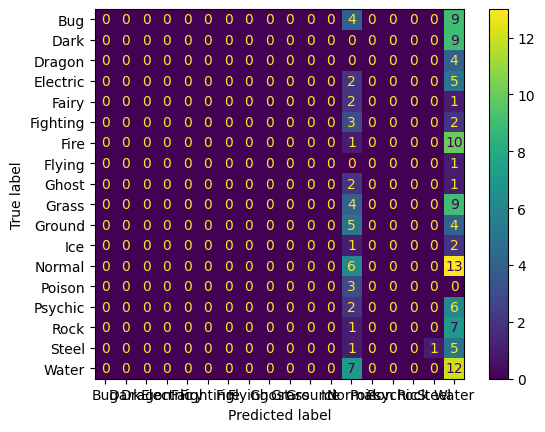

In [16]:
# SVM
model_fit_and_predict(SVC(decision_function_shape='ovo'), y_label, X_train, y_train, X_valid, y_valid)

 Toplam Doğruluk: % 10.891812865497077


,label,TruePredsPercent,Sum,true,false,most_frec
0,Bug,0.000000,13,0,13,Water
1,Dark,0.000000,9,0,9,Water
2,Dragon,0.250000,4,1,3,Water
3,Electric,0.000000,7,0,7,Water
4,Fairy,0.000000,3,0,3,Water
5,Fighting,0.000000,5,0,5,Water
6,Fire,0.000000,11,0,11,Water
7,Flying,0.000000,1,0,1,Water
8,Ghost,0.000000,3,0,3,Water
9,Grass,0.000000,13,0,13,Water


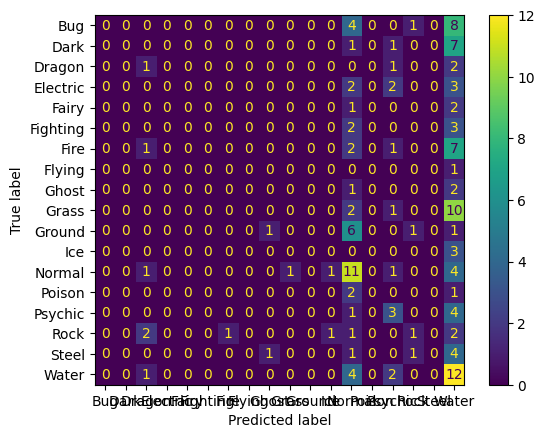

In [17]:
# SVM 2
model_fit_and_predict(SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo'), y_label, X_train, y_train, X_valid, y_valid)

 Toplam Doğruluk: % 5.555555555555555


,label,TruePredsPercent,Sum,true,false,most_frec
0,Bug,0.0,13,0,13,Water
1,Dark,0.0,9,0,9,Water
2,Dragon,0.0,4,0,4,Water
3,Electric,0.0,7,0,7,Water
4,Fairy,0.0,3,0,3,Water
5,Fighting,0.0,5,0,5,Water
6,Fire,0.0,11,0,11,Water
7,Flying,0.0,1,0,1,Water
8,Ghost,0.0,3,0,3,Water
9,Grass,0.0,13,0,13,Water


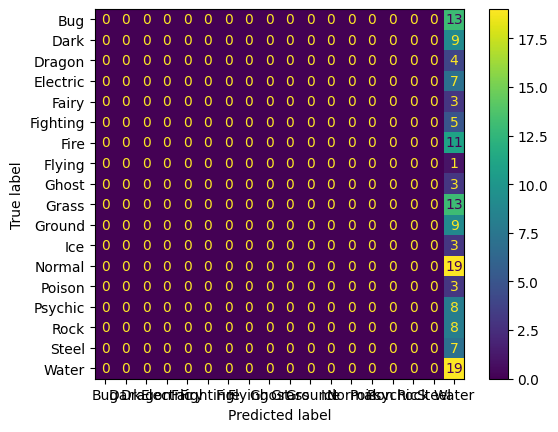

In [18]:
# SVM 3
model_fit_and_predict(SVC(kernel='rbf', gamma=0.5, C=0.1, decision_function_shape='ovr'), y_label, X_train, y_train, X_valid, y_valid)

 Toplam Doğruluk: % 17.60586311024907


,label,TruePredsPercent,Sum,true,false,most_frec
0,Bug,0.384615,13,5,8,Bug
1,Dark,0.111111,9,1,8,Normal
2,Dragon,0.750000,4,3,1,Dragon
3,Electric,0.142857,7,1,6,Fire
4,Fairy,0.000000,3,0,3,Bug
5,Fighting,0.000000,5,0,5,Bug
6,Fire,0.363636,11,4,7,Fire
7,Flying,0.000000,1,0,1,Fire
8,Ghost,0.333333,3,1,2,Ghost
9,Grass,0.076923,13,1,12,Fire


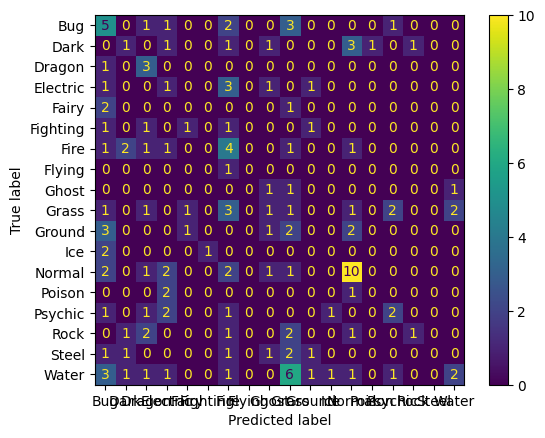

In [19]:
# KNN
model_fit_and_predict(KNeighborsClassifier(n_neighbors=3), y_label, X_train, y_train, X_valid, y_valid)

 Toplam Doğruluk: % 16.44536019536019


,label,TruePredsPercent,Sum,true,false,most_frec
0,Bug,0.692308,13,9,4,Bug
1,Dark,0.000000,9,0,9,Water
2,Dragon,0.250000,4,1,3,Dragon
3,Electric,0.000000,7,0,7,Normal
4,Fairy,0.000000,3,0,3,Psychic
5,Fighting,0.000000,5,0,5,Water
6,Fire,0.000000,11,0,11,Water
7,Flying,0.000000,1,0,1,Water
8,Ghost,0.000000,3,0,3,Bug
9,Grass,0.000000,13,0,13,Water


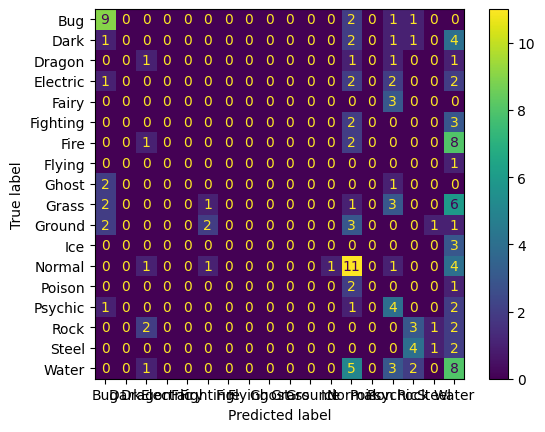

In [20]:
# GaussianProcessRegressor (GPC)
kernel = 1.0 * RBF(1.0)
GaussianProcessClassifier(kernel=kernel, random_state=0)

model_fit_and_predict(GaussianProcessClassifier(kernel=kernel, random_state=0), y_label, X_train, y_train, X_valid, y_valid)

 Toplam Doğruluk: % 30.736979881716724


,label,TruePredsPercent,Sum,true,false,most_frec
0,Bug,1.000000,13,13,0,Bug
1,Dark,0.222222,9,2,7,Dark
2,Dragon,0.000000,4,0,4,Fairy
3,Electric,0.285714,7,2,5,Electric
4,Fairy,0.666667,3,2,1,Fairy
5,Fighting,0.200000,5,1,4,Dragon
6,Fire,0.727273,11,8,3,Fire
7,Flying,0.000000,1,0,1,Psychic
8,Ghost,0.333333,3,1,2,Dragon
9,Grass,0.769231,13,10,3,Grass


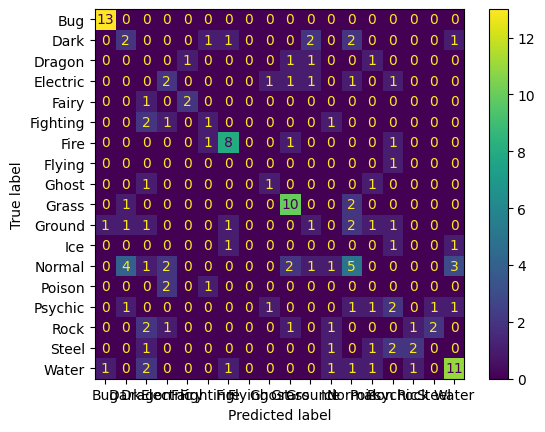

In [21]:
# DecisionTreeClassifier (DTC)
model_fit_and_predict(DecisionTreeClassifier(), y_label, X_train, y_train, X_valid, y_valid)

 Toplam Doğruluk: % 38.47672227058192


,label,TruePredsPercent,Sum,true,false,most_frec
0,Bug,1.000000,13,13,0,Bug
1,Dark,0.111111,9,1,8,Fighting
2,Dragon,0.250000,4,1,3,Dragon
3,Electric,0.428571,7,3,4,Electric
4,Fairy,0.666667,3,2,1,Fairy
5,Fighting,0.200000,5,1,4,Normal
6,Fire,0.636364,11,7,4,Fire
7,Flying,0.000000,1,0,1,Fire
8,Ghost,0.666667,3,2,1,Ghost
9,Grass,0.692308,13,9,4,Grass


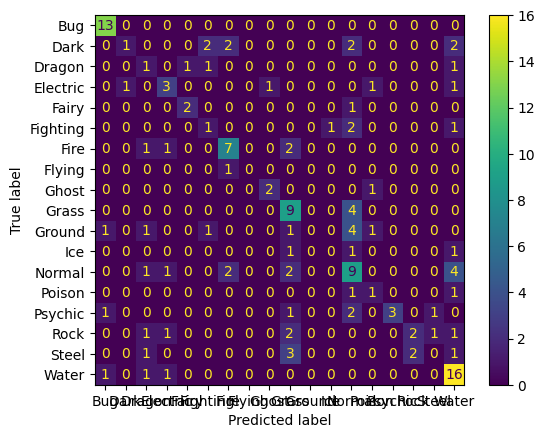

In [22]:
# RandomForestClassifier (RFC)
model_fit_and_predict(RandomForestClassifier(), y_label, X_train, y_train, X_valid, y_valid)

 Toplam Doğruluk: % 5.555555555555555


,label,TruePredsPercent,Sum,true,false,most_frec
0,Bug,0.0,13,0,13,Water
1,Dark,0.0,9,0,9,Water
2,Dragon,0.0,4,0,4,Water
3,Electric,0.0,7,0,7,Water
4,Fairy,0.0,3,0,3,Water
5,Fighting,0.0,5,0,5,Water
6,Fire,0.0,11,0,11,Water
7,Flying,0.0,1,0,1,Water
8,Ghost,0.0,3,0,3,Water
9,Grass,0.0,13,0,13,Water


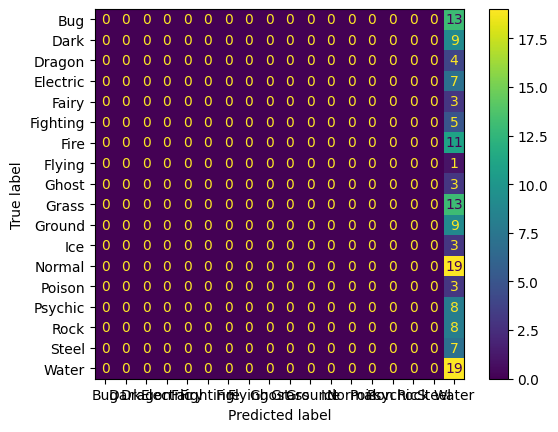

In [23]:
# MLPClassifier
model_fit_and_predict(MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1),
                      y_label, X_train, y_train, X_valid, y_valid)

 Toplam Doğruluk: % 9.859049332733544


,label,TruePredsPercent,Sum,true,false,most_frec
0,Bug,0.000000,13,0,13,Ghost
1,Dark,0.000000,9,0,9,Ghost
2,Dragon,0.000000,4,0,4,Ghost
3,Electric,0.000000,7,0,7,Ghost
4,Fairy,0.666667,3,2,1,Fairy
5,Fighting,0.000000,5,0,5,Ghost
6,Fire,0.000000,11,0,11,Ghost
7,Flying,0.000000,1,0,1,Ghost
8,Ghost,0.666667,3,2,1,Ghost
9,Grass,0.230769,13,3,10,Ghost


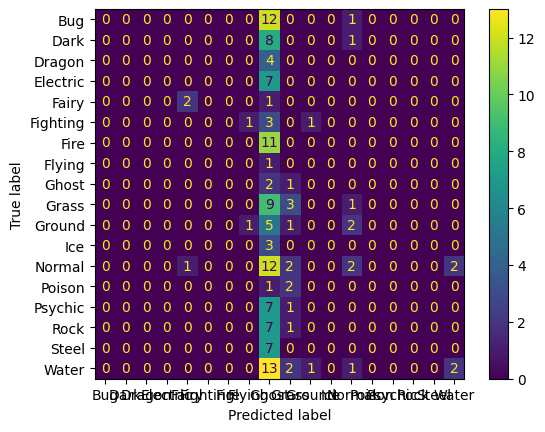

In [24]:
# SGDClassifier

model_fit_and_predict(SGDClassifier(loss="hinge", penalty="l2", max_iter=5), y_label, X_train, y_train, X_valid, y_valid)

 Toplam Doğruluk: % 45.39671098881625


,label,TruePredsPercent,Sum,true,false,most_frec
0,Bug,1.000000,13,13,0,Bug
1,Dark,0.222222,9,2,7,Fighting
2,Dragon,0.750000,4,3,1,Dragon
3,Electric,0.428571,7,3,4,Electric
4,Fairy,0.333333,3,1,2,Fairy
5,Fighting,0.200000,5,1,4,Normal
6,Fire,0.636364,11,7,4,Fire
7,Flying,0.000000,1,0,1,Fire
8,Ghost,0.666667,3,2,1,Ghost
9,Grass,0.923077,13,12,1,Grass


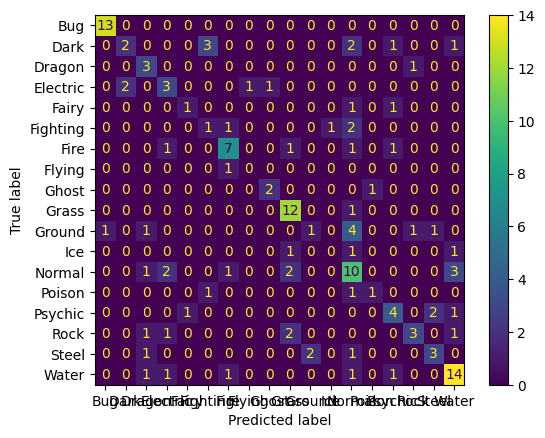

In [25]:
from sklearn.ensemble import ExtraTreesClassifier

model_fit_and_predict(ExtraTreesClassifier(n_estimators=100, random_state=0), y_label, X_train, y_train, X_valid, y_valid)

[Voting] ....................... (1 of 3) Processing lr, total=   0.1s
[Voting] ....................... (2 of 3) Processing rf, total=   0.2s
[Voting] ...................... (3 of 3) Processing dtc, total=   0.0s
 Toplam Doğruluk: % 43.198671860952565


,label,TruePredsPercent,Sum,true,false,most_frec
0,Bug,1.000000,13,13,0,Bug
1,Dark,0.444444,9,4,5,Dark
2,Dragon,0.750000,4,3,1,Dragon
3,Electric,0.428571,7,3,4,Electric
4,Fairy,1.000000,3,3,0,Fairy
5,Fighting,0.400000,5,2,3,Dragon
6,Fire,0.727273,11,8,3,Fire
7,Flying,0.000000,1,0,1,Dragon
8,Ghost,0.666667,3,2,1,Ghost
9,Grass,0.615385,13,8,5,Grass


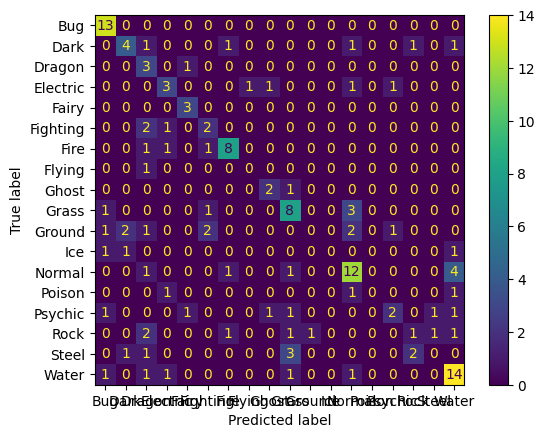

In [26]:
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
clf4 = DecisionTreeClassifier()

eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dtc', clf4)], voting='hard', verbose=True)

model_fit_and_predict(eclf1, y_label, X_train, y_train, X_valid, y_valid)

In [27]:
model_list = [
    
    LogisticRegression(multi_class='multinomial', random_state=1, solver="newton-cg"), # 0
    
    KNeighborsClassifier(n_neighbors=3), # 1
    
    GaussianProcessClassifier(kernel=1.0 * RBF(1.0), random_state=0), # 2
    
    DecisionTreeClassifier(), # 3
    
    RandomForestClassifier(), # 4
    
    MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2)), # 5
    
    SGDClassifier(loss="hinge", penalty="l2", max_iter=5), # 6
    
    ExtraTreesClassifier(n_estimators=100, random_state=0), # 7
    
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0), # 8
    
    HistGradientBoostingClassifier(), # 9
    
    VotingClassifier(estimators=[('lr', LogisticRegression(multi_class='multinomial', random_state=1)),
                                 ('rf', RandomForestClassifier(n_estimators=50, random_state=1)),
                                 ('dtc', DecisionTreeClassifier())],
                                 voting='hard') # 10
]

fast_model_select(model_list, X, y)

Model 0 Accuracy: %31.2062010142923
Model 1 Accuracy: %20.110073766712773
Model 2 Accuracy: %20.393614568925774
Model 3 Accuracy: %28.840479483633015
Model 4 Accuracy: %46.87874596588289
Model 5 Accuracy: %14.563162747810052
Model 6 Accuracy: %15.532503457814661
Model 7 Accuracy: %42.85846011987091
Model 8 Accuracy: %22.056823420931305
Model 9 Accuracy: %43.96035039188566
Model 10 Accuracy: %39.94179345320424


In [28]:
"""rfc_params = {
    "n_estimators" : [100, 150, 200, 300, 400, 500],
    "criterion" : ["gini", "entropy", "log_loss"],
    "max_depth" : [None, 1, 1.5, 2, 3, 5, 10, 100, 200],
    "min_samples_split" : [0.5, 1, 1.5, 2, 4, 5],
    "min_samples_leaf" : [0.5, 1, 1.5, 2, 4, 5],
    "min_weight_fraction_leaf" : [0.0, 0.05, 0.1, 0.15, 0.3, 0.35, 0.5],
    "max_features" : ["sqrt", "log2", None],
    "max_leaf_nodes" : [1, 5, 10, 50, 100, 250, 500, 1000],
    "min_impurity_decrease" : [0.0, 0.05, 0.1, 0.15, 0.3, 0.35, 0.5],
    "bootstrap" : [True, False],
    "n_jobs" : [-1],
    "verbose" : [1],
    "ccp_alpha" : [0.0, 0.05, 0.1, 0.15, 0.3, 0.35, 0.5]
}"""

'rfc_params = {\n    "n_estimators" : [100, 150, 200, 300, 400, 500],\n    "criterion" : ["gini", "entropy", "log_loss"],\n    "max_depth" : [None, 1, 1.5, 2, 3, 5, 10, 100, 200],\n    "min_samples_split" : [0.5, 1, 1.5, 2, 4, 5],\n    "min_samples_leaf" : [0.5, 1, 1.5, 2, 4, 5],\n    "min_weight_fraction_leaf" : [0.0, 0.05, 0.1, 0.15, 0.3, 0.35, 0.5],\n    "max_features" : ["sqrt", "log2", None],\n    "max_leaf_nodes" : [1, 5, 10, 50, 100, 250, 500, 1000],\n    "min_impurity_decrease" : [0.0, 0.05, 0.1, 0.15, 0.3, 0.35, 0.5],\n    "bootstrap" : [True, False],\n    "n_jobs" : [-1],\n    "verbose" : [1],\n    "ccp_alpha" : [0.0, 0.05, 0.1, 0.15, 0.3, 0.35, 0.5]\n}'

In [29]:
"""rfc_gscv_model = GridSearchCV( 
    RandomForestClassifier(),
    rfc_params,
    cv = 5,
    n_jobs = -1,
    verbose = 2).fit(X_train, y_train)"""

'rfc_gscv_model = GridSearchCV( \n    RandomForestClassifier(),\n    rfc_params,\n    cv = 5,\n    n_jobs = -1,\n    verbose = 2).fit(X_train, y_train)'

In [30]:
rfc_params1 = {
    "n_estimators" : [100, 150, 200],
    "criterion" : ["gini", "entropy", "log_loss"],
    "max_depth" : [None, 1, 1.5, 10, 100],
    "min_samples_split" : [0.5, 1, 1.5, 5],
    "n_jobs" : [-1],
    "verbose" : [1]
}

In [31]:
rfc_gscv_model1 = GridSearchCV( 
    RandomForestClassifier(),
    rfc_params1,
    cv = 5,
    n_jobs = -1,
    verbose = 2).fit(X_train, y_train)

rfc_gscv_model1.best_params_

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished


{'criterion': 'gini',
 'max_depth': None,
 'min_samples_split': 5,
 'n_estimators': 200,
 'n_jobs': -1,
 'verbose': 1}

In [32]:
rfc_params2 = {
    "n_estimators" : [100, 150, 200],
    "criterion" : ["gini", "entropy", "log_loss"],
    "max_depth" : [None, 250, 500, 1000],
    "min_samples_split" : [5, 7, 10, 15, 20],
    "n_jobs" : [-1],
    "verbose" : [1]
}

rfc_gscv_model2 = GridSearchCV( 
    RandomForestClassifier(),
    rfc_params2,
    cv = 5,
    n_jobs = -1,
    verbose = 2).fit(X_train, y_train)

rfc_gscv_model2.best_params_

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


{'criterion': 'gini',
 'max_depth': 500,
 'min_samples_split': 7,
 'n_estimators': 100,
 'n_jobs': -1,
 'verbose': 1}

In [33]:
rfc_params3 = {
    "n_estimators" : [100, 120, 140, 150, 175],
    "criterion" : ["gini", "entropy", "log_loss"],
    "max_depth" : [None, 300, 400, 500, 600],
    "min_samples_split" : [3, 3.5, 4, 5, 5.5, 6],
}

rfc_gscv_model3 = GridSearchCV( 
    RandomForestClassifier(),
    rfc_params3,
    cv = 5,
    n_jobs = -1,
    verbose = 2).fit(X_train, y_train)

rfc_gscv_model3.best_params_

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


{'criterion': 'gini',
 'max_depth': 600,
 'min_samples_split': 6,
 'n_estimators': 175}

In [34]:
rfc_gscv_model3.best_params_

# artık 'criterion': 'gini' seçildi.

{'criterion': 'gini',
 'max_depth': 600,
 'min_samples_split': 6,
 'n_estimators': 175}

In [35]:
rfc_params4 = {
    "n_estimators" : [80, 100, 140, 150, 175, 200],
    "max_depth" : [None, 300, 400, 500, 600],
    "min_samples_split" : [2, 2.5, 2.75, 3, 3.5],
}

rfc_gscv_model4 = GridSearchCV( 
    RandomForestClassifier(),
    rfc_params4,
    cv = 5,
    n_jobs = -1,
    verbose = 2).fit(X_train, y_train)

rfc_gscv_model4.best_params_

Fitting 5 folds for each of 150 candidates, totalling 750 fits


{'max_depth': 300, 'min_samples_split': 3, 'n_estimators': 100}

In [36]:
rfc_params5 = {
    "n_estimators" : [175, 200],
    "criterion" : ["gini"],
    "max_depth" : [300, 500],
    "min_samples_split" : [3],
    "min_samples_leaf" : [0.5, 1, 1.5, 2, 4, 5],
    "min_weight_fraction_leaf" : [0.0, 0.05, 0.1, 0.15, 0.3, 0.35, 0.5],
    "max_features" : ["sqrt", "log2", None]}

rfc_gscv_model5 = GridSearchCV( 
    RandomForestClassifier(),
    rfc_params5,
    cv = 5,
    n_jobs = -1,
    verbose = 2).fit(X_train, y_train)

rfc_gscv_model5.best_params_

Fitting 5 folds for each of 504 candidates, totalling 2520 fits


{'criterion': 'gini',
 'max_depth': 500,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200}

In [37]:
rfc_params6 = {
    "n_estimators" : [200, 250],
    "criterion" : ["gini"],
    "max_depth" : [250, 300, 350],
    "min_samples_split" : [3],
    "min_samples_leaf" : [0.75, 1, 1.25],
    "min_weight_fraction_leaf" : [0.0, 0.05, 0.01, 0.03],
    "max_features" : ["sqrt", "log2", None]}

rfc_gscv_model6 = GridSearchCV( 
    RandomForestClassifier(),
    rfc_params6,
    cv = 5,
    n_jobs = -1,
    verbose = 2).fit(X_train, y_train)

rfc_gscv_model6.best_params_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


{'criterion': 'gini',
 'max_depth': 350,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 250}

In [38]:
rfc_params7 = {
    "n_estimators" : [180, 200, 220],
    "criterion" : ["gini"],
    "max_depth" : [325, 350, 400],
    "min_samples_split" : [3],
    "min_samples_leaf" : [1],
    "min_weight_fraction_leaf" : [0.0],
    "max_features" : ["sqrt", "log2", None],
    "max_leaf_nodes" : [1, 5, 250, 500, 1000],
    "min_impurity_decrease" : [0.0, 0.05, 0.1, 0.5],
}

rfc_gscv_model7 = GridSearchCV( 
    RandomForestClassifier(),
    rfc_params7,
    cv = 5,
    n_jobs = -1,
    verbose = 1).fit(X_train, y_train)

rfc_gscv_model7.best_params_

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


{'criterion': 'gini',
 'max_depth': 400,
 'max_features': None,
 'max_leaf_nodes': 250,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200}

In [39]:
rfc_params8 = {
    "n_estimators" : [200],
    "criterion" : ["gini"],
    "max_depth" : [350, 450, 500],
    "min_samples_split" : [3],
    "min_samples_leaf" : [1],
    "min_weight_fraction_leaf" : [0.0],
    "max_features" : [None],
    "max_leaf_nodes" : [1000, 1500, 2000, 2500],
    "min_impurity_decrease" : [0.0, 0.01, 0.02],
    "bootstrap" : [True, False],
    "ccp_alpha" : [0.0, 0.05, 0.1, 0.5]
}

rfc_gscv_model8 = GridSearchCV( 
    RandomForestClassifier(),
    rfc_params8,
    cv = 5,
    n_jobs = -1,
    verbose = 1).fit(X_train, y_train)

rfc_gscv_model8.best_params_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'gini',
 'max_depth': 450,
 'max_features': None,
 'max_leaf_nodes': 2500,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200}

In [40]:
"""RandomForestClassifier(), # 0 43-45 lerden

    RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                          criterion='gini', max_depth=450,
                          max_features=None, max_leaf_nodes=1500,
                          min_impurity_decrease=0.0,
                          min_samples_leaf=1, min_samples_split=3,
                          min_weight_fraction_leaf=0.0,
                          n_estimators=200), # 1 44-46 lerde"""

model_list = [
    
    
    RandomForestClassifier(bootstrap=True, ccp_alpha=0.01,
                          criterion='gini', max_depth=500,
                          max_features=None, max_leaf_nodes=1200,
                          min_impurity_decrease=0.01,
                          min_samples_leaf=1, min_samples_split=3,
                          min_weight_fraction_leaf=0.02,
                          n_estimators=400,
                          max_samples=380, n_jobs=-1) # 2 49,924
]

fast_model_select(model_list, X, y)

Model 0 Accuracy: %47.845781466113415


 Toplam Doğruluk: % 29.959334038281405


,label,TruePredsPercent,Sum,true,false,most_frec
0,Bug,1.000000,13,13,0,Bug
1,Dark,0.000000,9,0,9,Normal
2,Dragon,0.000000,4,0,4,Water
3,Electric,0.428571,7,3,4,Electric
4,Fairy,0.000000,3,0,3,Normal
5,Fighting,0.200000,5,1,4,Normal
6,Fire,0.363636,11,4,7,Fire
7,Flying,0.000000,1,0,1,Fire
8,Ghost,0.666667,3,2,1,Ghost
9,Grass,0.615385,13,8,5,Grass


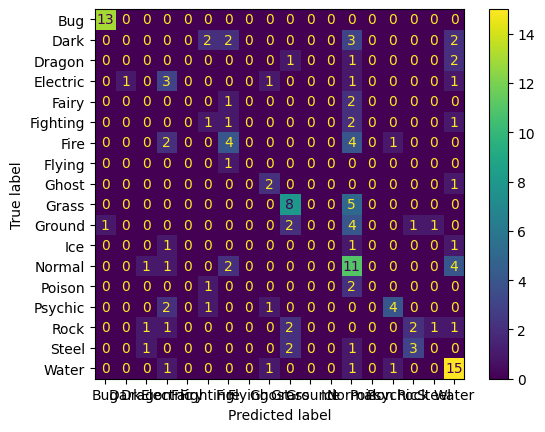

In [41]:
# benim denemelerimle ortaya çıkan
model_fit_and_predict(RandomForestClassifier(bootstrap=True, ccp_alpha=0.01,
                          criterion='gini', max_depth=500,
                          max_features=None, max_leaf_nodes=1200,
                          min_impurity_decrease=0.01,
                          min_samples_leaf=1, min_samples_split=3,
                          min_weight_fraction_leaf=0.02,
                          n_estimators=400,
                          max_samples=380, n_jobs=-1), y_label, X_train, y_train, X_valid, y_valid)

 Toplam Doğruluk: % 39.07450411836377


,label,TruePredsPercent,Sum,true,false,most_frec
0,Bug,1.000000,13,13,0,Bug
1,Dark,0.111111,9,1,8,Fighting
2,Dragon,0.500000,4,2,2,Dragon
3,Electric,0.428571,7,3,4,Electric
4,Fairy,0.666667,3,2,1,Fairy
5,Fighting,0.200000,5,1,4,Normal
6,Fire,0.636364,11,7,4,Fire
7,Flying,0.000000,1,0,1,Poison
8,Ghost,0.666667,3,2,1,Ghost
9,Grass,0.615385,13,8,5,Grass


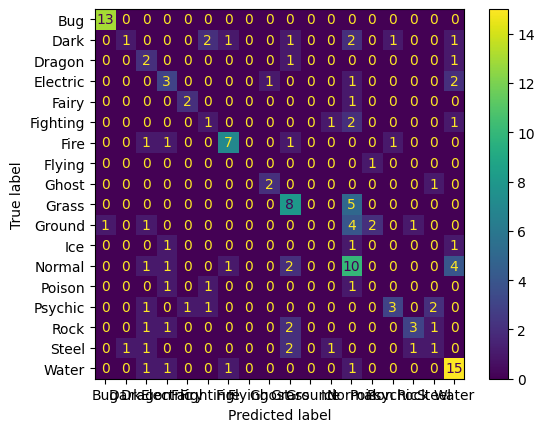

In [42]:
# GridSearch ile 8 iterasyon sonucu ortaya çıkan
model_fit_and_predict(RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                          criterion='gini', max_depth=450,
                          max_features=None, max_leaf_nodes=1500,
                          min_impurity_decrease=0.0,
                          min_samples_leaf=1, min_samples_split=3,
                          min_weight_fraction_leaf=0.0,
                          n_estimators=200), y_label, X_train, y_train, X_valid, y_valid)

 Toplam Doğruluk: % 33.80500509886475


,label,TruePredsPercent,Sum,true,false,most_frec
0,Bug,1.000000,13,13,0,Bug
1,Dark,0.111111,9,1,8,Fighting
2,Dragon,0.500000,4,2,2,Dragon
3,Electric,0.428571,7,3,4,Electric
4,Fairy,0.333333,3,1,2,Fairy
5,Fighting,0.200000,5,1,4,Normal
6,Fire,0.545455,11,6,5,Fire
7,Flying,0.000000,1,0,1,Fire
8,Ghost,0.333333,3,1,2,Ghost
9,Grass,0.692308,13,9,4,Grass


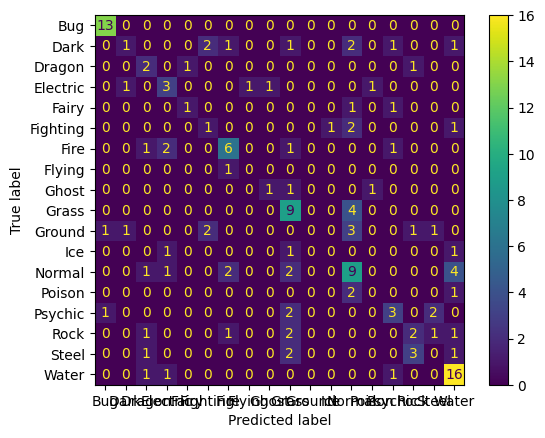

In [43]:
# Default değerleri
model_fit_and_predict(RandomForestClassifier(), y_label, X_train, y_train, X_valid, y_valid)